In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cleaningfunctions as clean
from scipy import stats
path = 'CANDY-HIERARCHY-2015-SURVEY-Responses.csv'
dt = pd.read_csv(path)
dt.head()

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,10/23/2015 8:46:20,35,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/23/2015 8:46:52,41,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/23/2015 8:47:34,33,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/23/2015 8:47:59,31,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/23/2015 8:48:12,30,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dt.shape

(5630, 124)

In [3]:
clean.numberofNAs(dt)

Timestamp 0
How old are you? 199
Are you going actually going trick or treating yourself? 0
 [Butterfinger] 383
 [100 Grand Bar] 656
 [Anonymous brown globs that come in black and orange wrappers] 298
 [Any full-sized candy bar] 277
 [Black Jacks] 991
 [Bonkers] 1182
 [Bottle Caps] 596
 [Box’o’ Raisins] 404
 [Brach products (not including candy corn)] 698
 [Bubble Gum] 459
 [Cadbury Creme Eggs] 378
 [Candy Corn] 394
 [Vials of pure high fructose corn syrup, for main-lining into your vein] 561
 [Candy that is clearly just the stuff given out for free at restaurants] 366
 [Cash, or other forms of legal tender] 303
 [Chiclets] 508
 [Caramellos] 597
 [Snickers] 290
 [Dark Chocolate Hershey] 370
 [Dental paraphenalia] 336
 [Dots] 493
 [Fuzzy Peaches] 655
 [Generic Brand Acetaminophen] 532
 [Glow sticks] 460
 [Broken glow stick] 350
 [Goo Goo Clusters] 900
 [Good N' Plenty] 583
 [Gum from baseball cards] 444
 [Gummy Bears straight up] 430
 [Creepy Religious comics/Chick Tracts] 335
 [Healthy

In [4]:
validages = clean.validateages(dt,'How old are you?')

c:\Users\lowde\OneDrive\Desktop\testing stuff\the club\Cleaning-Candy-Dataset\cleaningfunctions.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validages[agecolumn] = validages[agecolumn].astype(float)


In [5]:
validages

,Timestamp,How old are you?,Are you going actually going trick or treating yourself?,[Butterfinger],[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers],[Bottle Caps],...,[Necco Wafers],"Which day do you prefer, Friday or Sunday?",Please estimate the degrees of separation you have from the following folks [Bruce Lee],Please estimate the degrees of separation you have from the following folks [JK Rowling],Please estimate the degrees of separation you have from the following folks [Malala Yousafzai],Please estimate the degrees of separation you have from the following folks [Thom Yorke],Please estimate the degrees of separation you have from the following folks [JJ Abrams],Please estimate the degrees of separation you have from the following folks [Hillary Clinton],Please estimate the degrees of separation you have from the following folks [Donald Trump],Please estimate the degrees of separation you have from the following folks [Beyoncé Knowles]
0,10/23/2015 8:46:20,35.0,No,JOY,NaN,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/23/2015 8:46:52,41.0,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/23/2015 8:47:34,33.0,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/23/2015 8:47:59,31.0,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/23/2015 8:48:12,30.0,No,NaN,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10/31/2015 5:23:41,50.0,No,DESPAIR,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,...,DESPAIR,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5626,10/31/2015 5:29:27,43.0,No,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5627,10/31/2015 6:13:29,35.0,Yes,NaN,JOY,DESPAIR,JOY,NaN,NaN,DESPAIR,...,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5628,10/31/2015 6:26:53,38.0,No,JOY,JOY,JOY,JOY,JOY,JOY,JOY,...,JOY,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\lowde\OneDrive\Desktop\testing stuff\the club\Cleaning-Candy-Dataset\cleaningfunctions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[agecolumn] = dt[agecolumn].astype(float)


<AxesSubplot:>

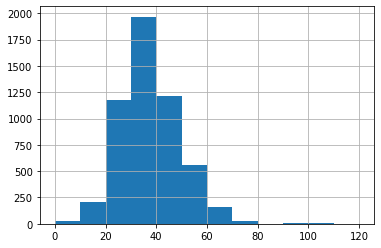

In [6]:
agesunder120 = clean.groupages(validages,"How old are you?",0,120)
agesunder120['How old are you?'].hist(bins=[0,10,20,30,40,50,60,70,80,90,100,110,120])

In [7]:
clean.findoutliers(agesunder120,'How old are you?')

,How old are you?,z_score
464,75.00,3.278794
680,74.00,3.192749
681,74.00,3.192749
888,72.00,3.020659
1130,99.00,5.343878
1279,72.00,3.020659
1287,72.00,3.020659
1561,77.00,3.450885
1564,74.00,3.192749
1569,75.00,3.278794


In [8]:
age1to80 = clean.groupages(validages,"How old are you?",1,80)

c:\Users\lowde\OneDrive\Desktop\testing stuff\the club\Cleaning-Candy-Dataset\cleaningfunctions.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[agecolumn] = dt[agecolumn].astype(float)


<AxesSubplot:>

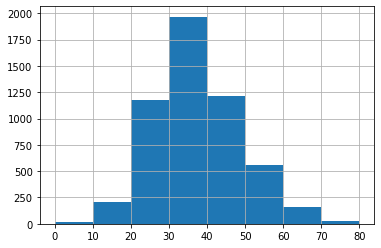

In [9]:
age1to80['How old are you?'].hist(bins=[0,10,20,30,40,50,60,70,80])

In [10]:
alljoy = clean.joypercentages(age1to80)

 [Butterfinger] 0.7882755842062853
JOY        3913
DESPAIR    1051
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.6897794741306191
JOY        3253
DESPAIR    1463
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.1026148969889065
DESPAIR    4530
JOY         518
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9322167487684729
JOY        4731
DESPAIR     344
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.07255304585900069
DESPAIR    4065
JOY         318
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.12075112907059662
DESPAIR    3699
JOY         508
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.411493288590604
DESPAIR    2806
JOY        1962
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.11124570967090652
DESPAIR    4402
JOY         551
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.2276231

In [11]:
alljoy

0.4236464630992819

In [12]:
age1to80.shape

(5324, 124)

In [13]:
joybelow20 = clean.joypercentages(clean.groupages(age1to80,"How old are you?",0,19))
joy20s = clean.joypercentages(clean.groupages(age1to80,"How old are you?",20,29))
joy30s = clean.joypercentages(clean.groupages(age1to80,"How old are you?",30,39))
joy40s = clean.joypercentages(clean.groupages(age1to80,"How old are you?",40,49))
joy50s = clean.joypercentages(clean.groupages(age1to80,"How old are you?",50,59))
joyabove60 = clean.joypercentages(clean.groupages(age1to80,"How old are you?",60,80))



 [Butterfinger] 0.6602870813397129
JOY        138
DESPAIR     71
Name:  [Butterfinger], dtype: int64

 [100 Grand Bar] 0.45652173913043476
DESPAIR    100
JOY         84
Name:  [100 Grand Bar], dtype: int64

 [Anonymous brown globs that come in black and orange wrappers] 0.13942307692307693
DESPAIR    179
JOY         29
Name:  [Anonymous brown globs that come in black and orange wrappers], dtype: int64

 [Any full-sized candy bar] 0.9302325581395349
JOY        200
DESPAIR     15
Name:  [Any full-sized candy bar], dtype: int64

 [Black Jacks] 0.09036144578313253
DESPAIR    151
JOY         15
Name:  [Black Jacks], dtype: int64

 [Bonkers] 0.09090909090909091
DESPAIR    150
JOY         15
Name:  [Bonkers], dtype: int64

 [Bottle Caps] 0.5208333333333334
JOY        100
DESPAIR     92
Name:  [Bottle Caps], dtype: int64

 [Box’o’ Raisins] 0.14832535885167464
DESPAIR    178
JOY         31
Name:  [Box’o’ Raisins], dtype: int64

 [Brach products (not including candy corn)] 0.33707865168539325
DE

<BarContainer object of 6 artists>

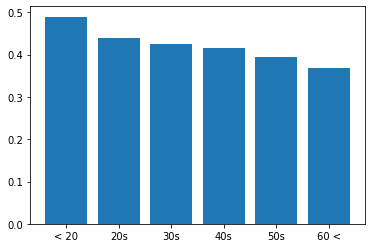

In [14]:
y = [joybelow20,joy20s,joy30s,joy40s,joy50s,joyabove60]
x = ['< 20', '20s', '30s','40s','50s', '60 <']
plt.bar(x,y)
# Shows that the younger people chose Joy more often

In [15]:
# find a way to store and return top 10 or bottom 10 etc

In [ ]:
clean.joypercentages(clean.groupages(age1to80,"How old are you?",70,80))

In [17]:
def joypercentagesdataframe(dt):
    candyandjoy = []
    for i in range(3,96):
        filler = dt[dt.columns[i]].dropna()
        try: # An KeyError happens when .value_counts()['JOY'] = 0 since it doesn't exist
            joyspercent = filler.value_counts()["JOY"]/sum(filler.value_counts())
        except:
            joyspercent = 0
        candyandjoy.append([dt.columns[i],joyspercent])
    return pd.DataFrame(candyandjoy, columns = ['Candy','Joy'])


In [19]:
joydt = joypercentagesdataframe(age1to80)
joydt

,Candy,Joy
0,[Butterfinger],0.788276
1,[100 Grand Bar],0.689779
2,[Anonymous brown globs that come in black and...,0.102615
3,[Any full-sized candy bar],0.932217
4,[Black Jacks],0.072553
...,...,...
88,[Twix],0.885772
89,[Vicodin],0.502111
90,[White Bread],0.055307
91,[Whole Wheat anything],0.090288


In [ ]:
joydt.sort_values(by='Joy')

<BarContainer object of 10 artists>

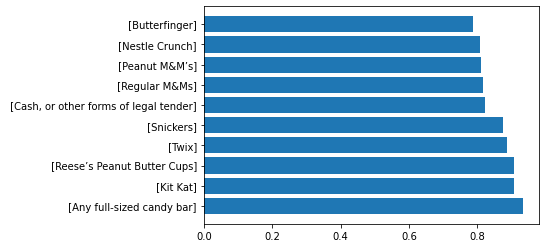

In [27]:
plt.barh(joydt.nlargest(10,'Joy')['Candy'],joydt.nlargest(10,'Joy')['Joy'])
# top 10 candies overall

<BarContainer object of 10 artists>

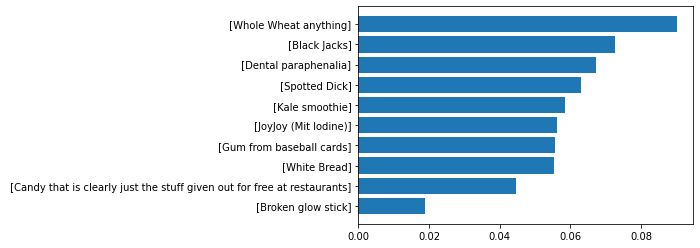

In [28]:
plt.barh(joydt.nsmallest(10,'Joy')['Candy'],joydt.nsmallest(10,'Joy')['Joy'])
# bottom 10 candies overall